In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmdstanpy
import arviz as az
import math

import joblib


data = joblib.load("/Users/rstiskalek/Downloads/data.joblib")

In [2]:
# Extract into python variables with the same names as the keys:
for key, value in data.items():
    if not isinstance(value, (float, int)):
        value = np.array(value)
    print(f"Setting {key}.")
    globals()[key] = value


e_mag_cepheid = np.sqrt(np.diag(C_Cepheid))
e_mag_SN_unique_Cepheid_host = np.sqrt(np.diag(C_SN_unique_Cepheid_host))

Setting mag_cepheid.
Setting logP.
Setting OH.
Setting C_Cepheid.
Setting L_Cepheid.
Setting L_Cepheid_host_dist.
Setting Cepheids_only.
Setting num_cepheids.
Setting num_hosts.
Setting Y_SN_Cepheid.
Setting C_SN_Cepheid.
Setting L_SN_Cepheid.
Setting L_SN_Cepheid_dist.
Setting mag_SN_unique_Cepheid_host.
Setting C_SN_unique_Cepheid_host.
Setting mean_std_mag_SN_unique_Cepheid_host.
Setting L_SN_unique_Cepheid_host.
Setting L_SN_unique_Cepheid_host_dist.
Setting Y_SN_HF.
Setting num_flow_SN.
Setting Y_SN.
Setting C_SN.
Setting L_SN.
Setting mu_N4258_anchor.
Setting e_mu_N4258_anchor.
Setting mu_LMC_anchor.
Setting e_mu_LMC_anchor.
Setting M_HST.
Setting e_M_HST.
Setting M_Gaia.
Setting e_M_Gaia.
Setting sigma_grnd.
Setting q_names.
Setting czcmb_cepheid_host.
Setting e_czcmb_cepheid_host.
Setting RA_host.
Setting dec_host.
Setting PV_covmat_cepheid_host.
Setting host_los_density.
Setting host_los_velocity.
Setting host_los_r.
Setting has_rand_los.
Setting num_rand_los.
Setting rand_los

In [6]:
c           = 299792.458  # speed of light [km/s]
r_max       = 200         # Maximum distance considered [Mpc]
num_anchors = 3

zcmb_cepheid_host   = czcmb_cepheid_host/c
e_zcmb_cepheid_host = e_czcmb_cepheid_host/c
print(e_zcmb_cepheid_host)
print(M_HST)
print(M_Gaia)

[2.0e-05 5.0e-05 2.0e-05 2.0e-05 1.5e-04 1.5e-04 1.0e-05 1.0e-05 2.0e-05
 1.5e-04 1.0e-05 6.0e-05 2.0e-05 0.0e+00 1.0e-05 2.0e-05 1.0e-05 2.0e-05
 1.0e-05 2.0e-05 2.0e-05 1.0e-05 2.0e-05 1.5e-04 1.9e-04 1.0e-05 1.5e-04
 1.5e-04 1.5e-04 6.0e-05 1.2e-04 1.5e-04 2.0e-05 1.0e-05 2.0e-05]
-5.803876
-5.9034147


In [7]:
#print(C_SN.shape)
#print(OH)
#print(mag_SN_unique_Cepheid_host)
#print(q_names)
#print(L_Cepheid_host_dist)
#print(C_SN_unique_Cepheid_host.shape)
#print(mu_N4258_anchor)
#print(sigma_grnd)
#print(zcmb_cepheid_host)
#print(e_zcmb_cepheid_host)

print('mu_LMC_anchor:  ',mu_LMC_anchor)
print('mu_N4258_anchor:',mu_N4258_anchor)




mu_LMC_anchor:   18.477
mu_N4258_anchor: 29.398


In [8]:
e_zcmb_cepheid_host

array([2.0e-05, 5.0e-05, 2.0e-05, 2.0e-05, 1.5e-04, 1.5e-04, 1.0e-05,
       1.0e-05, 2.0e-05, 1.5e-04, 1.0e-05, 6.0e-05, 2.0e-05, 0.0e+00,
       1.0e-05, 2.0e-05, 1.0e-05, 2.0e-05, 1.0e-05, 2.0e-05, 2.0e-05,
       1.0e-05, 2.0e-05, 1.5e-04, 1.9e-04, 1.0e-05, 1.5e-04, 1.5e-04,
       1.5e-04, 6.0e-05, 1.2e-04, 1.5e-04, 2.0e-05, 1.0e-05, 2.0e-05])

In [10]:
stan_data = {
    "num_cepheids": num_cepheids,
    "mag_cepheid": mag_cepheid,                       # length = num_cepheids
    "logP": logP,                                     # length = num_cepheids
    "OH": OH,                                         # length = num_cepheids
    # "C_Cepheid": C_Cepheid,                           # shape (num_cepheids, num_cepheids)
    "e_mag_cepheid": e_mag_cepheid,                   # length = num_cepheids

    "num_hosts": num_hosts,
    "num_anchors": num_anchors,
    "mag_SN_unique_Cepheid_host": mag_SN_unique_Cepheid_host,   # length = num_hosts
    "e_mag_SN_unique_Cepheid_host": e_mag_SN_unique_Cepheid_host,
    # "C_SN_unique_Cepheid_host": C_SN_unique_Cepheid_host,       # shape (num_hosts, num_hosts)

    "czcmb_cepheid_host": czcmb_cepheid_host,           # length = num_hosts
    "e_czcmb_cepheid_host": e_czcmb_cepheid_host,       # length = num_hosts
    "L_Cepheid_host_dist": L_Cepheid_host_dist,       # shape (num_cepheids, num_hosts+num_anchors)

    "mu_N4258_anchor": mu_N4258_anchor,
    "e_mu_N4258_anchor": e_mu_N4258_anchor,
    "mu_LMC_anchor": mu_LMC_anchor,
    "e_mu_LMC_anchor": e_mu_LMC_anchor,

    "sigma_grnd": sigma_grnd,
    "c": c,
}


In [11]:
model = cmdstanpy.CmdStanModel(stan_file="cosmo_model_SH0ES_without_PV_no_corr.stan")
model.compile()

19:53:31 - cmdstanpy - INFO - compiling stan file /Users/rstiskalek/Projects/CANDEL/notebooks/paper_SH0ES/cosmo_model_SH0ES_without_PV_no_corr.stan to exe file /Users/rstiskalek/Projects/CANDEL/notebooks/paper_SH0ES/cosmo_model_SH0ES_without_PV_no_corr
19:53:37 - cmdstanpy - INFO - compiled model executable: /Users/rstiskalek/Projects/CANDEL/notebooks/paper_SH0ES/cosmo_model_SH0ES_without_PV_no_corr
19:53:37 - cmdstanpy - WARNING - CmdStanModel.compile() is deprecated and will be removed in the next major version. To compile a model, use the CmdStanModel() constructor or cmdstanpy.compile_stan_file().


In [17]:
# ----------------------
# Run CmdStan model
# ----------------------
burnin = 1000
number_of_samples = 10000

fit = model.sample(data=stan_data, chains=10, iter_warmup=burnin, iter_sampling=number_of_samples)

19:55:05 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

chain 9 |          | 00:00 Status

chain 10 |          | 00:00 Status

19:57:17 - cmdstanpy - INFO - CmdStan done processing.


In [19]:
# H0 = fit.stan_variable("h") * 100

np.mean(H0), np.std(H0)
print("H0 = {:.3f} ± {:.3f}".format(np.mean(H0), np.std(H0)))

H0 = 68.180 ± 1.881


In [13]:
fit.summary()

,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,-2355.220000,0.144534,4.588270,4.232820,-2363.500000,-2354.790000,-2348.430000,1015.300,1280.490,1.001700
h,0.681974,0.000606,0.018876,0.018544,0.650255,0.682427,0.712676,975.620,1307.310,1.000150
log_r[1],1.929320,0.000404,0.012224,0.012091,1.908920,1.929170,1.949730,921.103,948.133,1.001920
log_r[2],3.657700,0.000983,0.037014,0.037295,3.597220,3.657210,3.719310,1436.080,1441.270,1.000120
log_r[3],3.609380,0.000958,0.034570,0.035538,3.551980,3.609490,3.665930,1332.590,1633.320,1.000220
...,...,...,...,...,...,...,...,...,...,...
m_SN_pred[31],12.340600,0.001861,0.084864,0.085027,12.201000,12.341400,12.478800,2098.980,1188.310,1.002200
m_SN_pred[32],14.039300,0.001338,0.060945,0.061676,13.940000,14.039600,14.140400,2072.250,1324.910,0.999295
m_SN_pred[33],13.271500,0.001456,0.069825,0.070720,13.156100,13.273000,13.383200,2313.070,1732.850,1.000630
m_SN_pred[34],14.019400,0.001433,0.069445,0.070498,13.907400,14.019800,14.135600,2367.980,1479.220,1.000980


In [24]:
# Extract posterior samples
h_samples        = fit.stan_variable("h")
M_SN0_samples    = fit.stan_variable("M_SN0")
Mw_samples       = fit.stan_variable("M_w") 
bw_samples       = fit.stan_variable("b_w") 
Zw_samples       = fit.stan_variable("Z_w") 
# u_r_samples      = fit.stan_variable("u_r")  # shape (draws, N)
# r_samples        = (u_r_samples ** (1/3.0)) * r_max  # convert to physical distances (Mpc)

#m_SN_max_samples = fit.stan_variable("m_SN_max")
sigma_v_samples = fit.stan_variable("sigma_v")
# M_samples = fit.stan_variable("M")
# dZP_samples = fit.stan_variable("dZP")

In [25]:
params = [
    ("h", h_samples, r"$h$"),
    ("M_SN0", M_SN0_samples, r"$M_{SN0}$"),
    ("M_w", Mw_samples, r"$M_w$"),
    ("b_w", bw_samples, r"$b_w$"),
    ("Z_w", Zw_samples, r"$Z_w$"),
    #("m_SN_max", m_SN_max_samples, r"$m_{SN,max}$"),
    # ("dZP", dZP_samples, r"dZP")
#    ("r_LMC", r_LMC_samples, r"$r_\mathrm{LMC}$ [Mpc]"),
#    ("r_NGC4258", r_NGC4258_samples, r"$r_\mathrm{NGC4258}$ [Mpc]")
]

In [26]:
np.round(np.mean(sigma_v_samples), 2), np.round(np.std(sigma_v_samples), 2)

(296.66, 39.73)

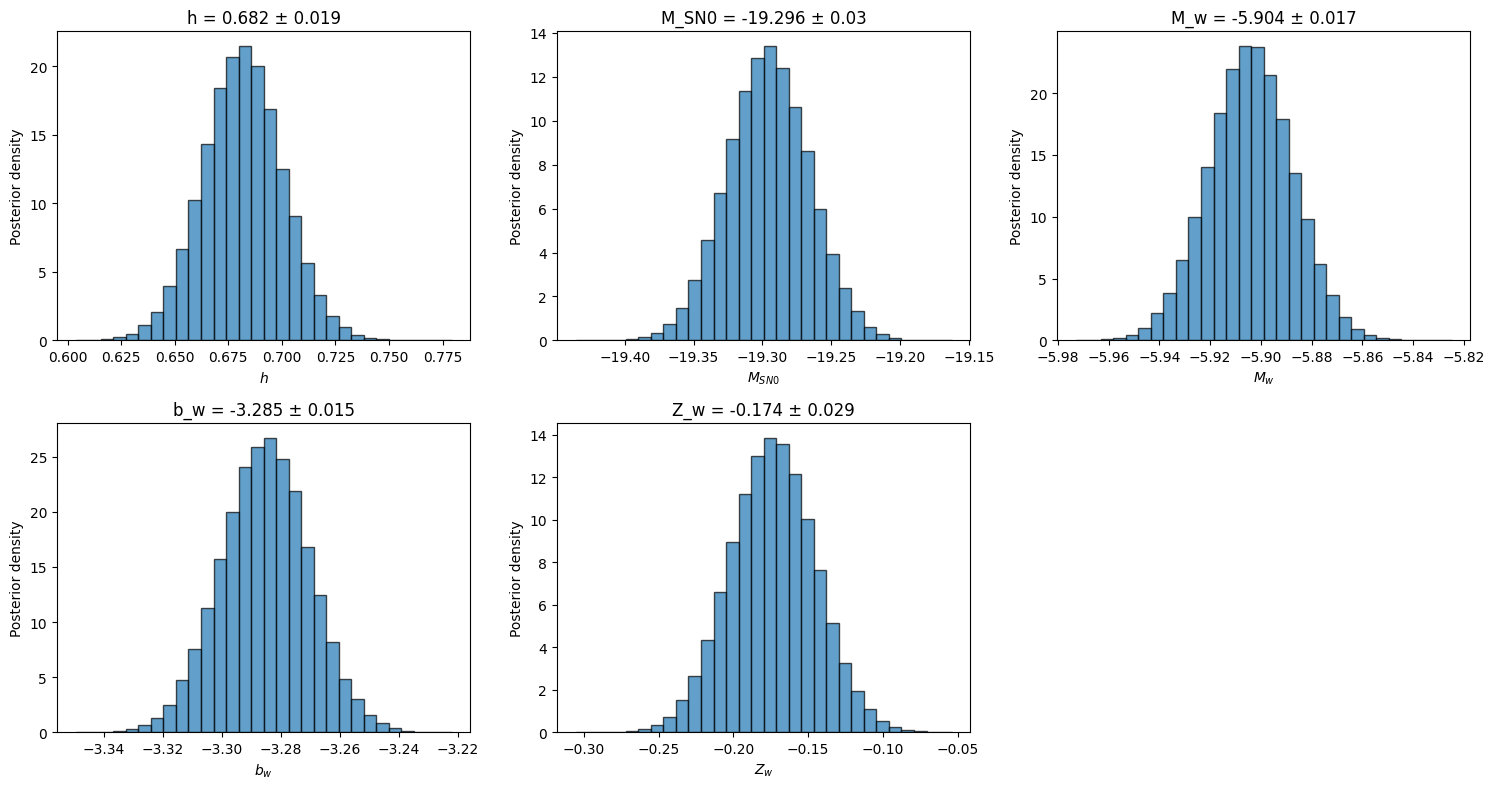

In [27]:

# Dynamically determine grid size
n_params = len(params)
n_cols   = 3
n_rows   = math.ceil(n_params / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes      = axes.flatten()

for ax, (name, samples, xlabel) in zip(axes, params):
    ax.hist(samples, bins=30, density=True, alpha=0.7, edgecolor="black")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Posterior density")
    ax.set_title(f"{name} = "+ f"{np.round(np.mean(samples), 3)} ± {np.round(np.std(samples), 3)}")
    

# Remove any unused subplots
for j in range(len(params), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig('Stan_SH0ES.jpg')
plt.show()


In [ ]:
samples = az.from_cmdstanpy(fit)

In [ ]:
#az.plot_trace(fit, compact=False);

In [ ]:
#print(f"ArviZ version: {az.__version__}")

az.plot_pair(
    samples,
    var_names=["h", "Z_w", "M_w", "b_w", "M_SN0","sigma_v"],
    kind="kde",
    marginals="True",
#    reference_values=Truth,
#    reference_values_kwargs = {"color":'r', "markersize":20},
    textsize=22,
    kde_kwargs={
        "hdi_probs": [0.68, 0.95, 0.997],  # Plot 30%, 60% and 90% HDI contours
        "contourf_kwargs": {"cmap": "Blues"},
    },
)
#plt.savefig('SH0ES_corner.jpg')
plt.show()

In [ ]:
fit.summary()